# Project 8 - Decision trees and neural networks

## Set Up

In [1]:
import pandas as pd

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from graphviz import Source
from IPython.display import SVG

## Read & Clean the Data

Also update the name of the target column to not include a space at the beginning.

And add a new target column that includes the top 25% as popular (1) and the bottom 75% as unpopular (0).

In [2]:
news = pd.read_csv('OnlineNewsPopularity.csv')
news = news.rename({' shares':'shares'}, axis=1)
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
news['popular'] = news.shares.apply(lambda x: 1 if x >= news.shares.quantile(.75) else 0)
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,0
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,0
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,0
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,0


Here we can see some statistics for the original target column and the new target columnn.

In [4]:
news['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [5]:
news['popular'].describe()

count    39644.000000
mean         0.251968
std          0.434148
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: popular, dtype: float64

## Analysis

### Feature Selection

Our dataset had about 60 features. We did not want to use all 60 in the intereste of time. We selected a few features based on the following: ease of use, what we found interesting, what we thought would be good predictors.

**Selected Features:**

n_tokens_content, num_keywords, is_weekend, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world


**Target Variable:**

popular (0,1)

In [6]:
# create a list of feature columns
feature_cols = [' n_tokens_content',' num_keywords',' is_weekend',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world']

X = news[feature_cols]
y = news.popular

### Tree 1: Max Depth = 3

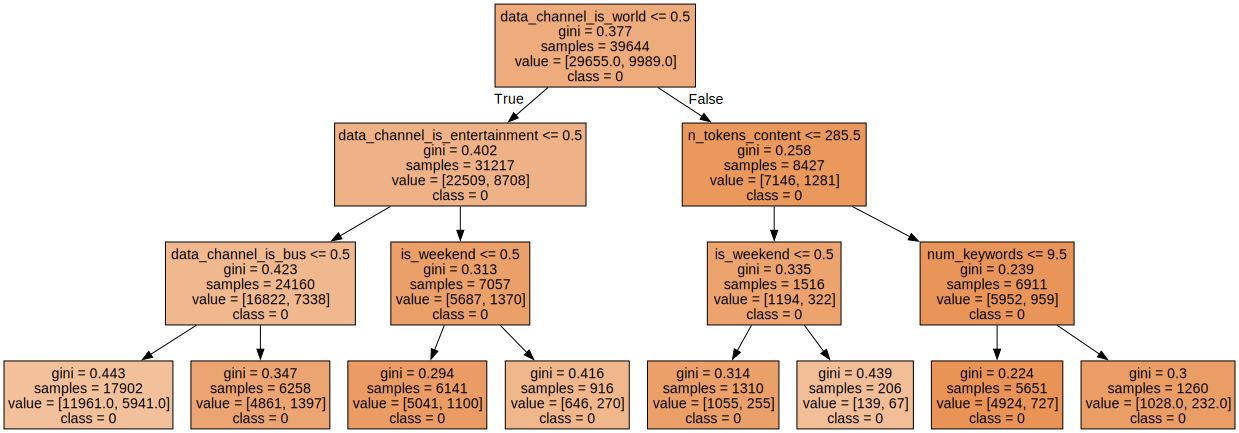

In [7]:
# fit a classification tree with max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

### Tree 2: Max Depth = 5

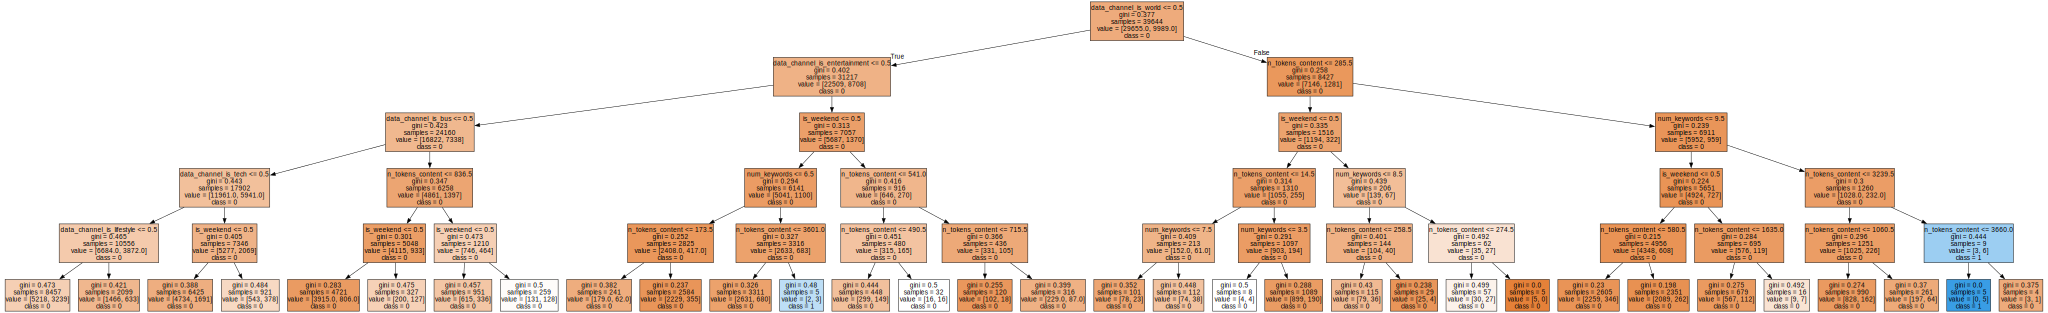

In [8]:
# fit a classification tree with max_depth=5
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

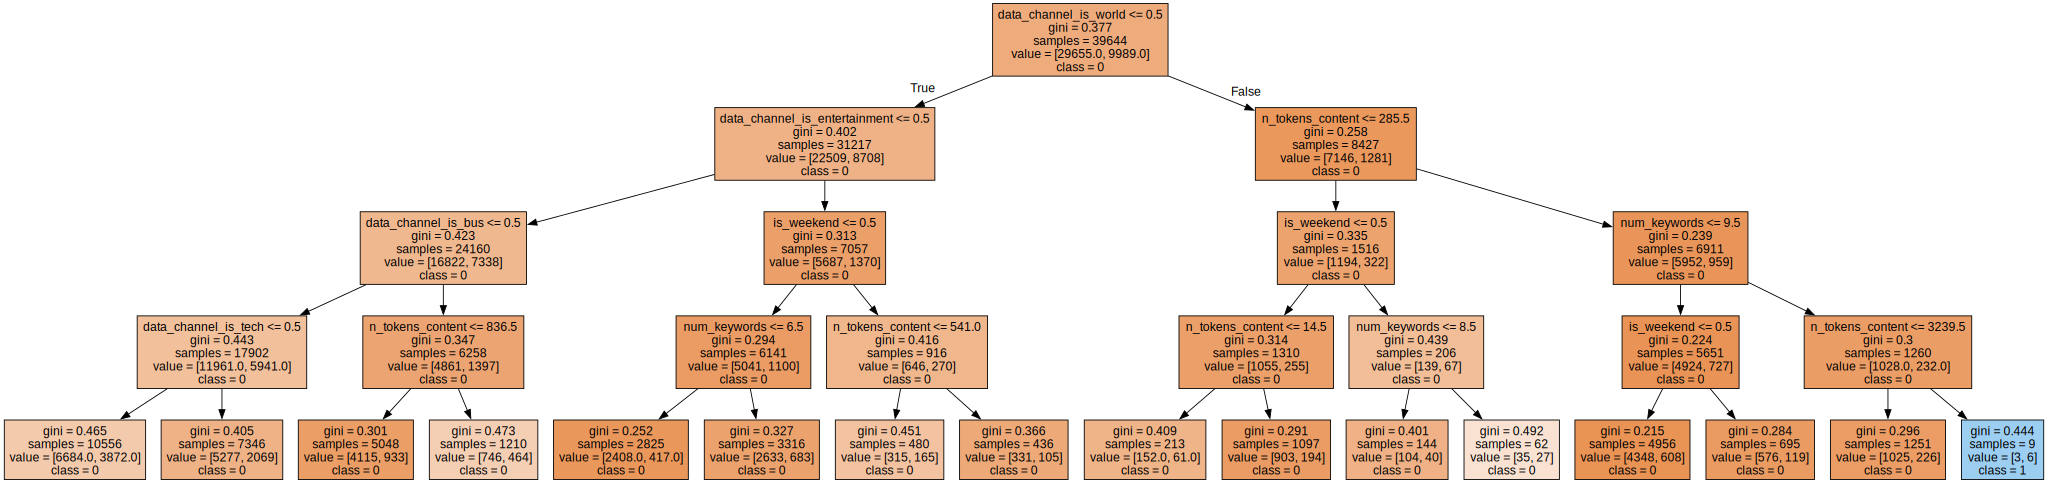

In [9]:
# create a list of feature columns
feature_cols = [' n_tokens_content',' num_keywords',' is_weekend',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world']

# define X and y
X = news[feature_cols]
y = news.popular

# fit a classification tree with max_depth=4
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)